# Kr atom - basis set tests

In [113]:
import numpy as np
import pandas as pd
import functools

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [114]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## toc <a name="toc"></a>

* [Results: total energy values](#calcs)

* [Rn: completeness profiles of the standard basis sets](#standard)
    * [dyall.acv3z set](#dyallacv3z)
    * [dyall.acv4z set](#dyallacv4z)

* [Rn: completeness profiles of the completeness-optimized (co) basis sets](#co)
    * [co_mirrors_dyallacv3z](#co_mirrors_dyallacv3z)
    * [co_mirrors_dyallacv4z](#co_mirrors_dyallacv4z)    
    
* [Radial distribution of the isotropic magnetizability calculated with selected basis sets](#radial)
    * [dyall.acv3z set](#radial_dyallacv3z)
    * [dyall.acv4z set](#radial_dyallacv4z)
    * [co_mirrors_dyallacv3z set](#radial_co_mirrors_dyallacv3z)
    * [co_mirrors_dyallacv4z set](#radial_co_mirrors_dyallacv4z)

All completeness profiles were generated with ERKALE program: [link](https://github.com/susilehtola/erkale/wiki/ERKALE)    

In [111]:
def plot_completeness_profiles(df, max_l, title, xrange, save=''):
    
    # set labels:
    labels=["s", "p", "d", "f", "g", "h", "i"]

    # plot
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure()
    fig.set_size_inches(20,10)
    ax = fig.add_subplot(1, 1, 1)

    # settings
    m = ['o','D','v','8','^','*', '>']
    cb = ["darkgreen","red","blue","purple","gold","sienna","pink"]

    if max_l >= 0:
        ax.plot(df["probe"], df["s"], color=cb[0], marker=m[0], linewidth=1, markersize=4)
    if max_l >= 1:    
        ax.plot(df["probe"], df["p"], color=cb[1], marker=m[1], linewidth=1, markersize=4)
    if max_l >= 2:    
        ax.plot(df["probe"], df["d"], color=cb[2], marker=m[2], linewidth=1, markersize=4)
    if max_l >= 3:    
        ax.plot(df["probe"], df["f"], color=cb[3], marker=m[3], linewidth=1, markersize=4)
    if max_l >= 4:    
        ax.plot(df["probe"], df["g"], color=cb[4], marker=m[4], linewidth=1, markersize=4)
    if max_l >= 5:    
        ax.plot(df["probe"], df["h"], color=cb[5], marker=m[5], linewidth=1, markersize=4)  
    if max_l >= 6:    
        ax.plot(df["probe"], df["i"], color=cb[6], marker=m[6], linewidth=1, markersize=4)         
    if max_l >= 7:
        print("add higher exponents")

    # limits, labels, ticks and legend    
    plt.title(title, fontsize=24)
    ax.set_xlabel(r"$log(\alpha)$",fontsize=20)
    ax.set_ylabel(r"Y($\alpha$)", fontsize=20)

    plt.xlim(xrange[0], xrange[1])
    plt.legend(prop={'size':18}, fancybox=True, loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, shadow=True)

    if save:
        plt.savefig(save)


def read_energy_into_dataframe(fname):
    df = pd.read_csv(fname,sep=',',skiprows=2, 
                     names=["name","basis_set","total_energy", "Niter"])
    df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    return df

def calc_Ediff(df):
    df_3z = df[df['name'].str.contains('dyallv3z')]
    Eref_3z  = df_3z.loc[df_3z['name'] == 'Kr_dyallv3z']['total_energy'].values
    Ediff_3z  = df_3z['total_energy'] - Eref_3z[0]
    df_3z['Ediff'] = Ediff_3z
    
    df_4z = df[df['name'].str.contains('dyallacv4z')]
    Eref_4z  = df_4z.loc[df_4z['name'] == 'Kr_dyallacv4z']['total_energy'].values   
    Ediff_4z  = df_4z['total_energy'] - Eref_4z[0]
    df_4z['Ediff'] = Ediff_4z
    
    df = pd.concat([df_3z, df_4z], ignore_index=True)
    return df


In [109]:
# all floats in this notebook are displayed with 2 decimal digits
pd.options.display.float_format = '{:.13f}'.format

## Results: total energy values <a name="calcs"></a>
[go to TOC](#toc)

In [112]:
data = read_energy_into_dataframe('results.csv')
data=calc_Ediff(data)

data

/home/gosia/toolbox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/gosia/toolbox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,name,basis_set,total_energy,Niter,Ediff
0,Kr_dyallv3z,23s16p10d1f,-2801.2925148237459,11,0.0000000000000
1,Kr_et_3z_start_from_maxall_dyallv3z,28s20p12d1f,-2801.2924394673528,11,0.0000753563932
2,Kr_et_3z_start_from_maxelement_dyallv3z,27s21p12d1f,-2801.2928109450445,11,-0.0002961212986
3,Kr_et_3z_start_from_minall_dyallv3z,28s21p13d1f,-2801.2926953534570,11,-0.0001805297111
4,Kr_et_3z_start_from_minelement_dyallv3z,28s20p12d1f,-2801.2925154096010,11,-0.0000005858551
5,Kr_et_4z_start_from_maxall_dyallv3z,37s27p15d1f,-2801.2935682724828,50*,-0.0010534487369
6,Kr_et_4z_start_from_maxelement_dyallv3z,36s27p16d1f,-2801.2935759429674,50*,-0.0010611192215
7,Kr_et_4z_start_from_minall_dyallv3z,36s27p16d1f,-2801.2935866823250,50*,-0.0010718585791
8,Kr_et_4z_start_from_minelement_dyallv3z,37s26p16d1f,-2801.2933431625361,50*,-0.0008283387901
9,Kr_dyallacv4z,31s22p14d6f4g1h,-2801.2936360414110,11,0.0000000000000


* Desired convergence limit not reached after   50 iterations but the current convergence is acceptable

thresholds:
```
.EVCCNV
 1.0D-08 1.0D-6
```

### dyall.acv3z set <a name="dyallacv3z"></a>
[go to TOC](#toc)

Completeness profiles for the dyall.acv3z set;

data directory:
* "../completeness_profiles_standard_sets/dyallacv3z"

In [7]:
f_dir="../completeness_profiles_standard_sets/dyallacv3z/"

f_s=f_dir+"dyallacv3z_s.gbs-prof.dat"
df_s = pd.read_csv(f_s, sep="\s+",header=None, names=["probe", "s"])

f_p=f_dir+"dyallacv3z_p.gbs-prof.dat"
df_p = pd.read_csv(f_p, sep="\s+",header=None, names=["probe", "s", "p"])

f_d=f_dir+"dyallacv3z_d.gbs-prof.dat"
df_d = pd.read_csv(f_d, sep="\s+",header=None, names=["probe", "s", "p", "d"])

f_f=f_dir+"dyallacv3z_f.gbs-prof.dat"
df_f = pd.read_csv(f_f, sep="\s+",header=None, names=["probe",  "s", "p", "d", "f"])

f_g=f_dir+"dyallacv3z_g.gbs-prof.dat"
df_g = pd.read_csv(f_g, sep="\s+",header=None, names=["probe",  "s", "p", "d", "f", "g"])

dfs = [df_s, 
       df_p.drop(columns=["s"],axis=1), 
       df_d.drop(columns=["s","p"],axis=1), 
       df_f.drop(columns=["s","p","d"],axis=1),
       df_g.drop(columns=["s","p","d","f"],axis=1)]

df = functools.reduce(lambda left,right: pd.merge(left,right,on=["probe"]), dfs)

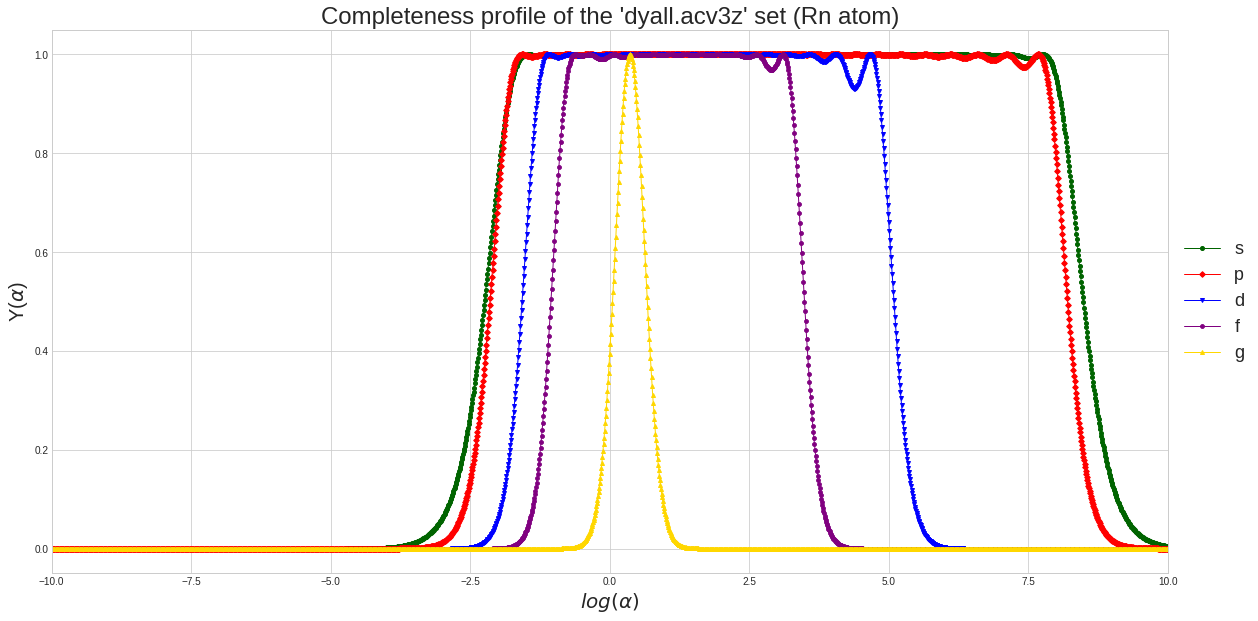

In [8]:
plot_completeness_profiles(df, 4, "Completeness profile of the 'dyall.acv3z' set (Rn atom)", [-10, 10], save="completeness_profile_Rn_dyallacv3z.jpg")

Let's see how the RKB set generated from 'dyall.acv3z" set looks like:

In [9]:
f_dir="../completeness_profiles_standard_sets/dyallacv3z/rkb_sets/completeness_profiles/"
fout=f_dir+"rkb.gbs-prof.dat"
colnames=["probe", "s", "p", "d", "f", "g", "h"]
df1 = pd.read_csv(fout, sep="\s+",header=None, names=colnames)

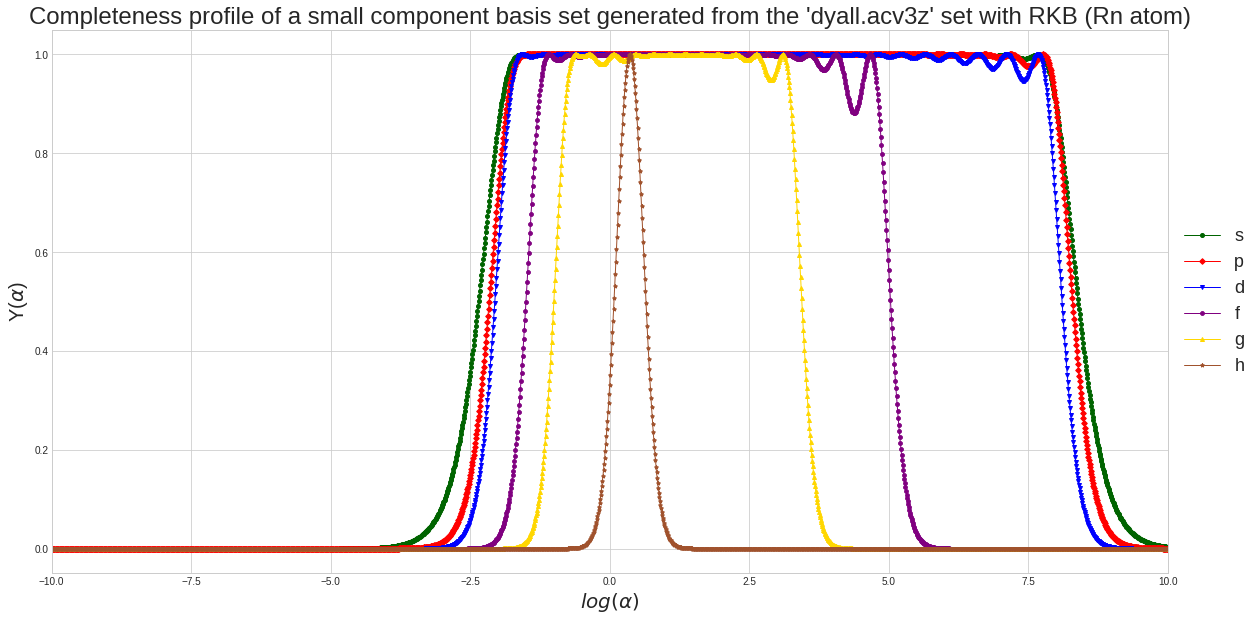

In [10]:
plot_completeness_profiles(df1, 5, "Completeness profile of a small component basis set generated from the 'dyall.acv3z' set with RKB (Rn atom)", [-10, 10], save="completeness_profile_Rn-small-RKB_dyallacv3z.jpg")

### dyall.acv4z set <a name="dyallacv4z"></a>
[go to TOC](#toc)

Completeness profiles for the dyall.acv4z set;

data directory:
* "../completeness_profiles_standard_sets/dyallacv4z"

In [11]:
f_dir="../completeness_profiles_standard_sets/dyallacv4z/"

f_s=f_dir+"dyallacv4z_s.gbs-prof.dat"
df_s = pd.read_csv(f_s, sep="\s+",header=None, names=["probe", "s"])

f_p=f_dir+"dyallacv4z_p.gbs-prof.dat"
df_p = pd.read_csv(f_p, sep="\s+",header=None, names=["probe", "s", "p"])

f_d=f_dir+"dyallacv4z_d.gbs-prof.dat"
df_d = pd.read_csv(f_d, sep="\s+",header=None, names=["probe", "s", "p", "d"])

f_f=f_dir+"dyallacv4z_f.gbs-prof.dat"
df_f = pd.read_csv(f_f, sep="\s+",header=None, names=["probe",  "s", "p", "d", "f"])

f_g=f_dir+"dyallacv4z_g.gbs-prof.dat"
df_g = pd.read_csv(f_g, sep="\s+",header=None, names=["probe",  "s", "p", "d", "f", "g"])

f_h=f_dir+"dyallacv4z_h.gbs-prof.dat"
df_h = pd.read_csv(f_h, sep="\s+",header=None, names=["probe",  "s", "p", "d", "f", "g", "h"])

dfs = [df_s, 
       df_p.drop(columns=["s"],axis=1), 
       df_d.drop(columns=["s","p"],axis=1), 
       df_f.drop(columns=["s","p","d"],axis=1),
       df_g.drop(columns=["s","p","d","f"],axis=1),
       df_h.drop(columns=["s","p","d","f","g"],axis=1)]

df = functools.reduce(lambda left,right: pd.merge(left,right,on=["probe"]), dfs)

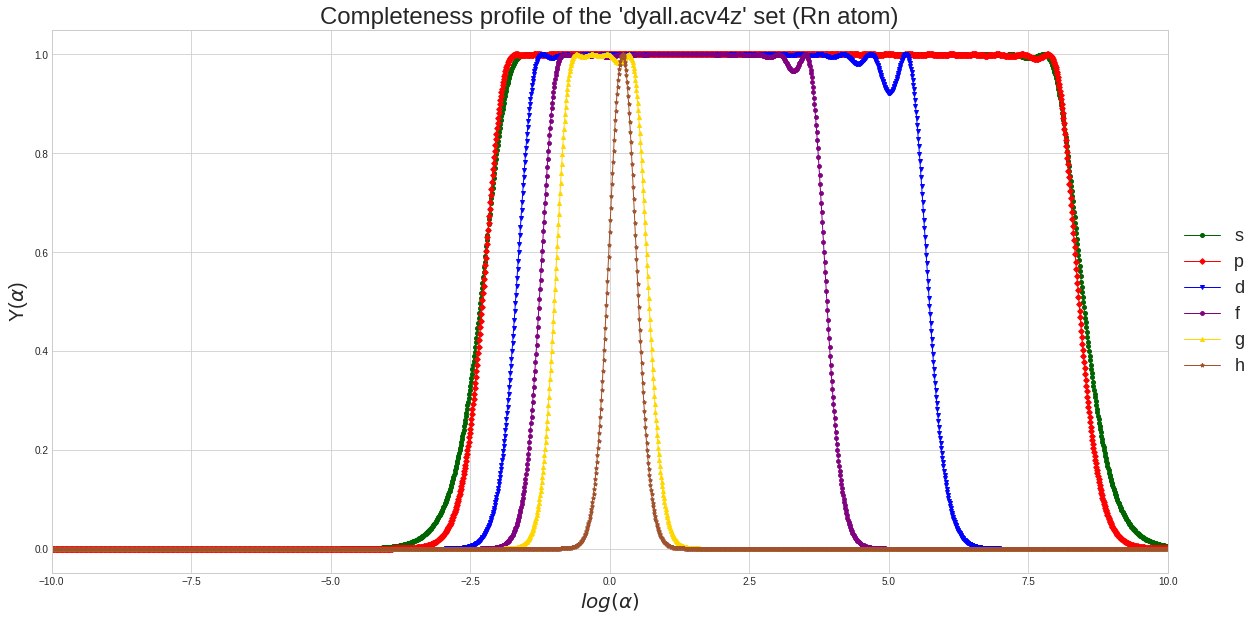

In [12]:
plot_completeness_profiles(df, 5, "Completeness profile of the 'dyall.acv4z' set (Rn atom)", [-10, 10], save="completeness_profile_Rn_dyallacv4z.jpg")

Let's see how the RKB set generated from 'dyall.acv4z" set looks like:

In [13]:
f_dir="../completeness_profiles_standard_sets/dyallacv4z/rkb_sets/completeness_profiles/"
fout=f_dir+"rkb.gbs-prof.dat"
colnames=["probe", "s", "p", "d", "f", "g", "h", "i"]
df1 = pd.read_csv(fout, sep="\s+",header=None, names=colnames)

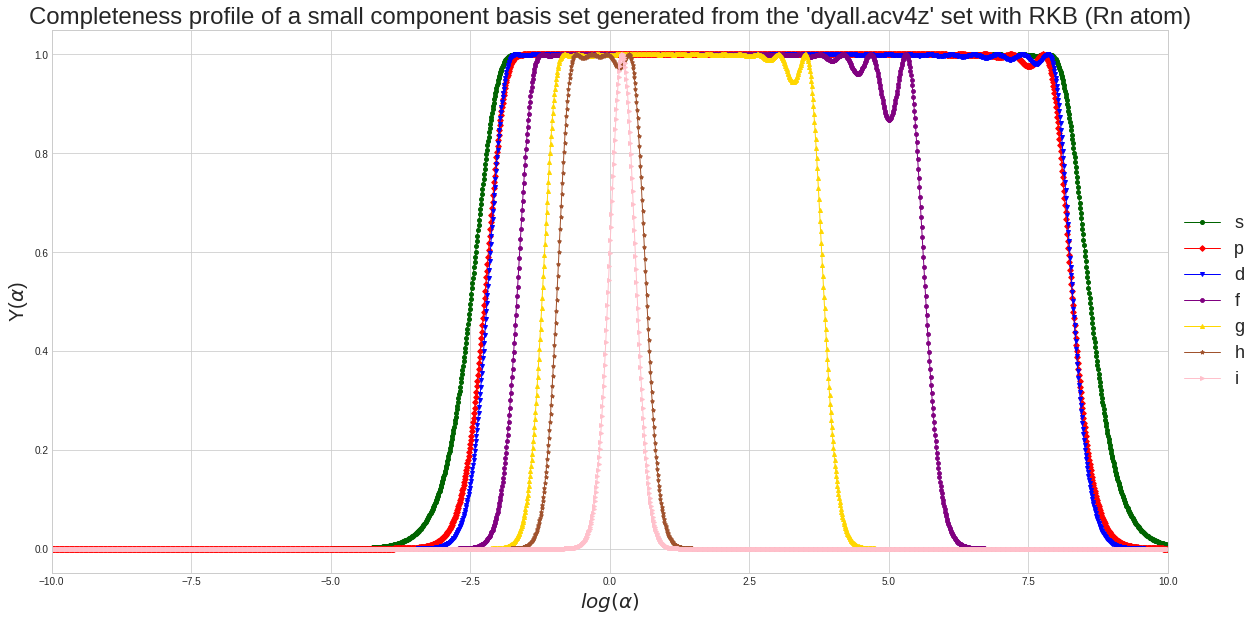

In [14]:
plot_completeness_profiles(df1, 6, "Completeness profile of a small component basis set generated from the 'dyall.acv4z' set with RKB (Rn atom)", [-10, 10], save="completeness_profile_Rn-small-RKB_dyallacv4z.jpg")

# completeness-optimized (co) basis sets <a name="co"></a>
[go to TOC](#toc)

### co_mirrors_dyallacv3z set <a name="co_mirrors_dyallacv3z"></a>
[go to TOC](#toc)

The range of exponents and their number is analogous to dyall.acv3z basis set:

* Rn: 31s 27p 18d 12f 1g, exponents optimized in the range (log scale):
    * s: -3, 8
    * p: -3, 8
    * d: -3, 5
    * f: -2, 4
    * g: -1, 1

data directory:
* "../completeness_optimized_sets/co_mirrors_dyallacv3z"

**Completeness profiles for this set:**

In [15]:
f_dir="../completeness_optimized_sets/co_mirrors_dyallacv3z/completeness_profiles/"

f_s=f_dir+"optimized_31_s_range_-3-8_Rn_dyallacv3z.gbs-prof.dat"
df_s = pd.read_csv(f_s, sep="\s+",header=None, names=["probe", "s"])

f_p=f_dir+"optimized_27_p_range_-3-8_Rn_dyallacv3z.gbs-prof.dat"
df_p = pd.read_csv(f_p, sep="\s+",header=None, names=["probe", "s", "p"])

f_d=f_dir+"optimized_18_d_range_-3-5_Rn_dyallacv3z.gbs-prof.dat"
df_d = pd.read_csv(f_d, sep="\s+",header=None, names=["probe", "s", "p", "d"])

f_f=f_dir+"optimized_12_f_range_-2-4_Rn_dyallacv3z.gbs-prof.dat"
df_f = pd.read_csv(f_f, sep="\s+",header=None, names=["probe",  "s", "p", "d", "f"])

f_g=f_dir+"optimized_1_g_range_-1-1_Rn_dyallacv3z.gbs-prof.dat"
df_g = pd.read_csv(f_g, sep="\s+",header=None, names=["probe",  "s", "p", "d", "f", "g"])

dfs = [df_s, 
       df_p.drop(columns=["s"],axis=1), 
       df_d.drop(columns=["s","p"],axis=1), 
       df_f.drop(columns=["s","p","d"],axis=1),
       df_g.drop(columns=["s","p","d","f"],axis=1)]

df = functools.reduce(lambda left,right: pd.merge(left,right,on=["probe"]), dfs)

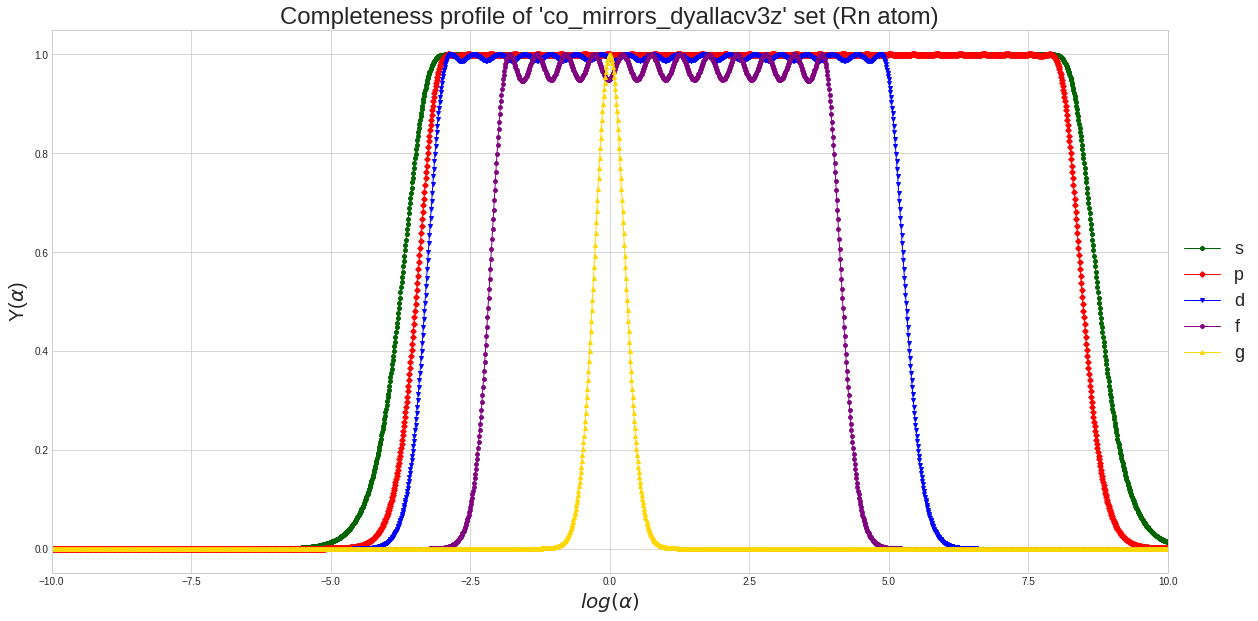

In [16]:
plot_completeness_profiles(df, 4, "Completeness profile of 'co_mirrors_dyallacv3z' set (Rn atom)", [-10, 10], save="completeness_profile_Rn_co_mirrors_dyallacv3z.jpg")

Let's see how the RKB set generated from "co_mirrors_dyallacv3z" set looks like:

In [17]:
f_dir="../completeness_optimized_sets/co_mirrors_dyallacv3z/rkb_sets/completeness_profiles/"
fout=f_dir+"rkb.gbs-prof.dat"
colnames=["probe", "s", "p", "d", "f", "g", "h"]
df1 = pd.read_csv(fout, sep="\s+",header=None, names=colnames)

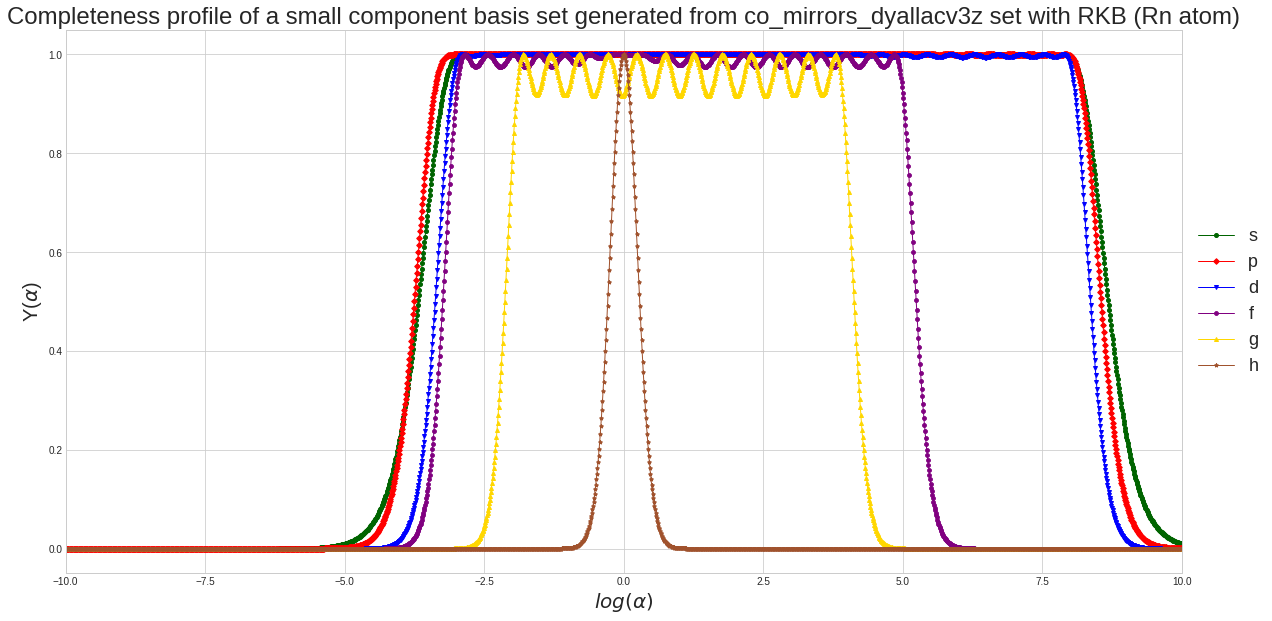

In [18]:
plot_completeness_profiles(df1, 5, "Completeness profile of a small component basis set generated from co_mirrors_dyallacv3z set with RKB (Rn atom)", [-10, 10], save="completeness_profile_Rn-small-RKB_co_mirrors_dyallacv3z.jpg")

# Radial distribution of the isotropic magnetizability calculated with selected basis sets <a name="radial"></a>
[go to TOC](#toc)

### dyall.acv3z set <a name="radial_dyallacv3z"></a>
[go to TOC](#toc)

In [23]:
f_rkb = "../outputs/dc_pbe0/dyallacv3z/radial_distribution_rkb/magnetizability_iso/plot.radial.scalar"
f_smb = "../outputs/dc_pbe0/dyallacv3z/radial_distribution_smb/magnetizability_iso/plot.radial.scalar"
radial_rkb = read_radial_file_into_dataframe(f_rkb)
radial_smb = read_radial_file_into_dataframe(f_smb)

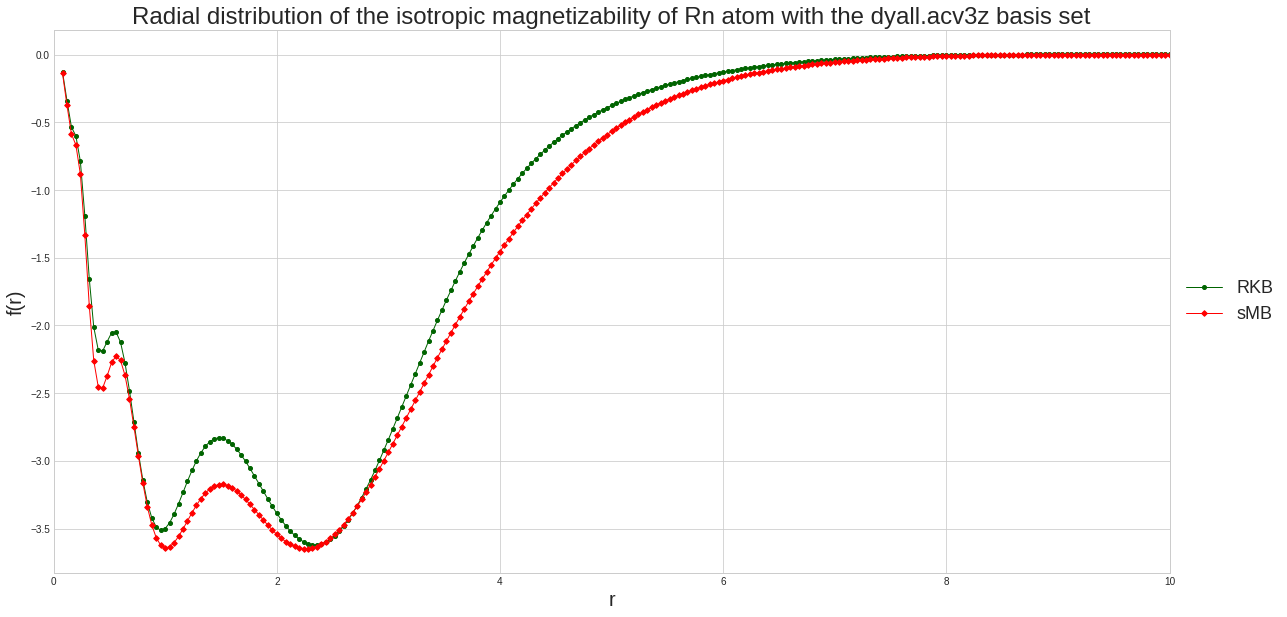

In [24]:
plot_radial_distribution(radial_rkb, radial_smb, "Radial distribution of the isotropic magnetizability of Rn atom with the dyall.acv3z basis set", xrange=[0,10], save="radial_dist_magnetizability_iso_Rn_dyallacv3z.jpg")

### dyall.acv4z set <a name="radial_dyallacv4z"></a>
[go to TOC](#toc)

In [25]:
f_rkb = "../outputs/dc_pbe0/dyallacv4z/radial_distribution_rkb/magnetizability_iso/plot.radial.scalar"
f_smb = "../outputs/dc_pbe0/dyallacv4z/radial_distribution_smb/magnetizability_iso/plot.radial.scalar"
radial_rkb = read_radial_file_into_dataframe(f_rkb)
radial_smb = read_radial_file_into_dataframe(f_smb)

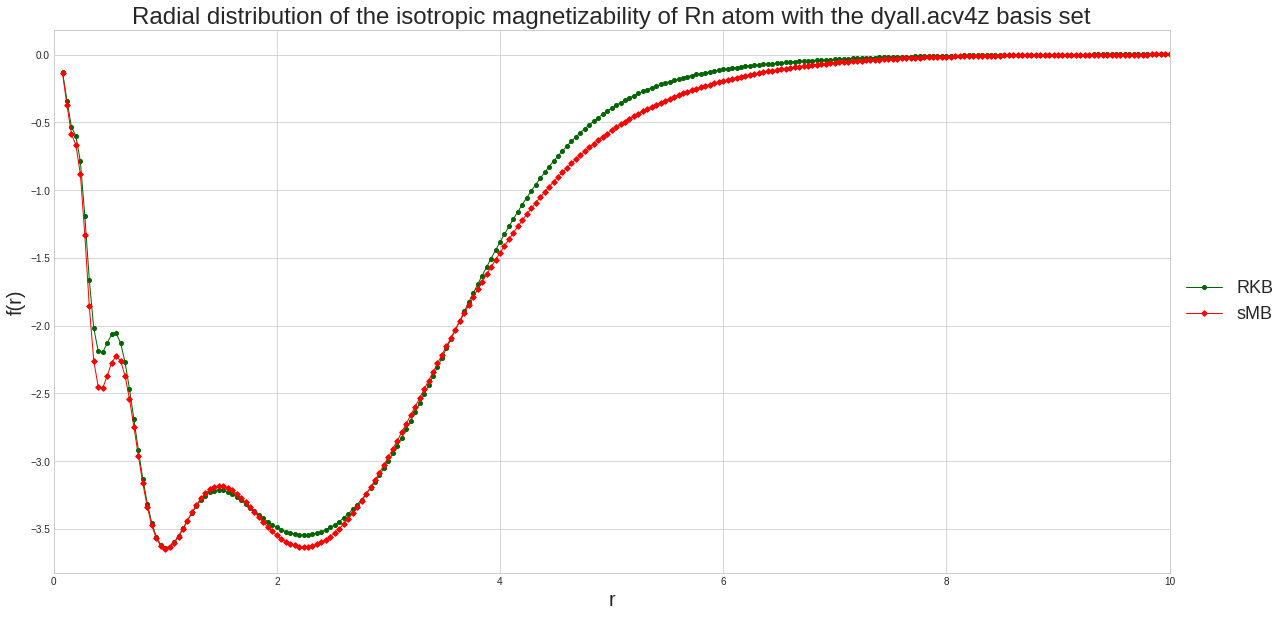

In [26]:
plot_radial_distribution(radial_rkb, radial_smb, "Radial distribution of the isotropic magnetizability of Rn atom with the dyall.acv4z basis set", xrange=[0,10], save="radial_dist_magnetizability_iso_Rn_dyallacv4z.jpg")